In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<AxesSubplot:>

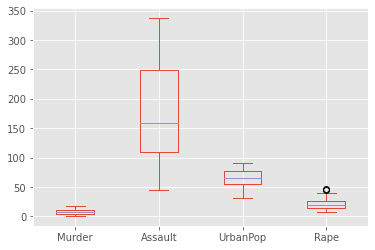

In [7]:
plt.style.use('ggplot')
df.plot.box()

In [9]:
cols = ['Murder', 'Assault','Rape']
features = df[cols]
features.head()

,Murder,Assault,Rape
0,13.2,236,21.2
1,10.0,263,44.5
2,8.1,294,31.0
3,8.8,190,19.5
4,9.0,276,40.6


In [10]:
'''
Before we can apply FCM, we need to scale the features to have a mean of 0 and a standard 
deviation of 1. This is done to ensure that all features are equally important in the 
clustering process.'''
scaler = StandardScaler()
X = scaler.fit_transform(features)
X

array([[ 1.25517927,  0.79078716, -0.00345116],
       [ 0.51301858,  1.11805959,  2.50942392],
       [ 0.07236067,  1.49381682,  1.05346626],
       [ 0.23470832,  0.23321191, -0.18679398],
       [ 0.28109336,  1.2756352 ,  2.08881393],
       [ 0.02597562,  0.40290872,  1.88390137],
       [-1.04088037, -0.73648418, -1.09272319],
       [-0.43787481,  0.81502956, -0.58583422],
       [ 1.76541475,  1.99078607,  1.1505301 ],
       [ 2.22926518,  0.48775713,  0.49265293],
       [-0.57702994, -1.51224105, -0.11129987],
       [-1.20322802, -0.61527217, -0.75839217],
       [ 0.60578867,  0.94836277,  0.29852525],
       [-0.13637203, -0.70012057, -0.0250209 ],
       [-1.29599811, -1.39102904, -1.07115345],
       [-0.41468229, -0.67587817, -0.34856705],
       [ 0.44344101, -0.74860538, -0.53190987],
       [ 1.76541475,  0.94836277,  0.10439756],
       [-1.31919063, -1.06375661, -1.44862395],
       [ 0.81452136,  1.56654403,  0.70835037],
       [-0.78576263, -0.26375734, -0.531

Text(0, 0.5, 'Assault')

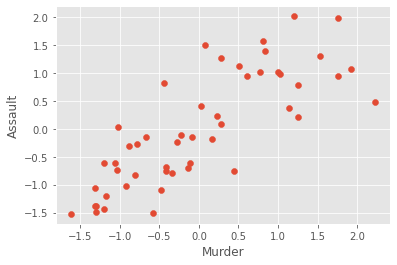

In [11]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Murder')
plt.ylabel('Assault')

In [12]:
from fcmeans import FCM
n_clusters = 3
fcm = FCM(n_clusters=n_clusters)
fcm.fit(X)
# Get the cluster centers and the membership matrix
centroids = fcm.centers
membership_mat = fcm.u

In [13]:
import numpy as np
# Assign each data point to the cluster with the highest membership
labels = np.argmax(membership_mat, axis=1)
labels

array([0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

In [15]:
#same results
labels = fcm.predict(X)
labels

array([0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

In [17]:
#PEC = -1 * sum(c=1 to C) (n_c / N) * log2(n_c / N)
n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for n_clusters in n_clusters_list:
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(X)
    models.append(fcm)

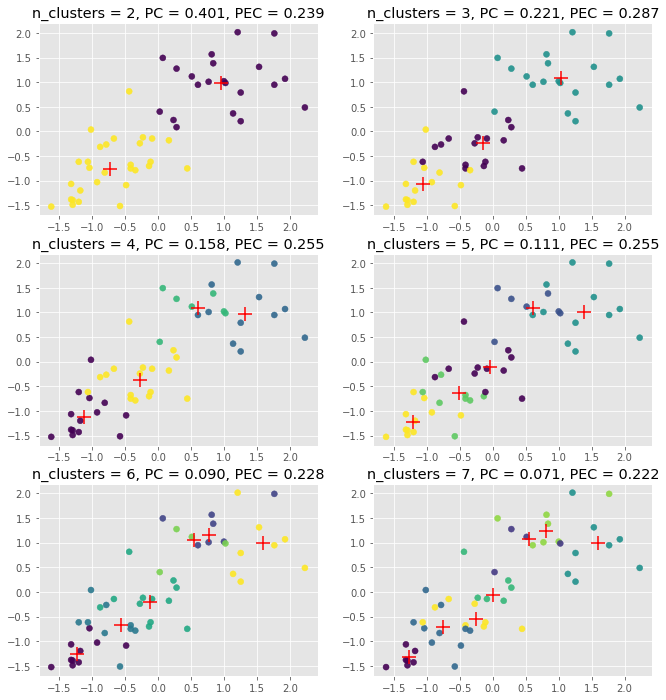

In [18]:
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,12))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient
    
    fcm_centers = model.centers
    fcm_labels = model.predict(X)
    # plot result
    axe.scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.9)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=200, c='r')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
plt.show()

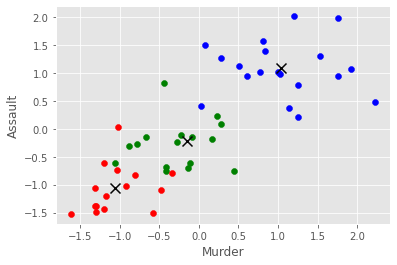

In [19]:
# Define the colors for each cluster
colors = ['b', 'g', 'r', 'c', 'm']
n_clusters=3
# Plot the data points
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i])
# Plot the centroid
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='#050505')
# Set the axis labels
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

In [20]:
results = features.copy()
results['Labels'] = labels
results.head()

,Murder,Assault,Rape,Labels
0,13.2,236,21.2,0
1,10.0,263,44.5,0
2,8.1,294,31.0,0
3,8.8,190,19.5,1
4,9.0,276,40.6,0


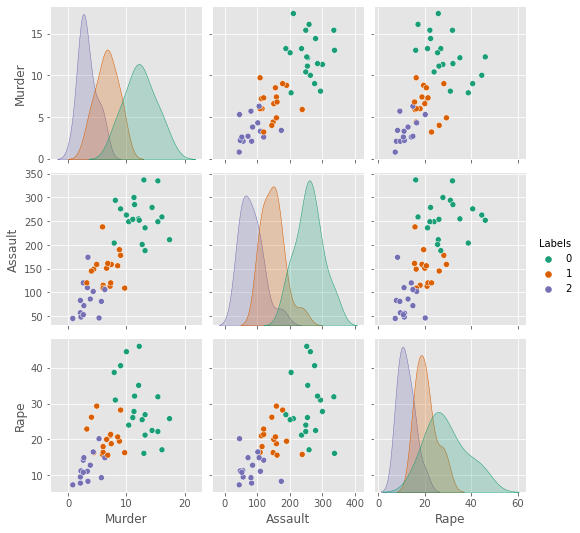

In [21]:
import seaborn as sns

# Create a scatterplot matrix
sns.pairplot(results, hue='Labels', palette='Dark2')